In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load data
df = pd.read_csv('/content/german_credit_data.csv')
print(df.head())

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  


In [6]:
# Info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [8]:
# Check nulls
print(df.isnull().sum())

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


In [9]:
# Fill categorical nulls with most frequent value (mode)
df['Saving accounts'].fillna(df['Saving accounts'].mode()[0], inplace=True)
df['Checking account'].fillna(df['Checking account'].mode()[0], inplace=True)

# Confirm all cleaned
print(df.isnull().sum())

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64


/tmp/ipython-input-1130474774.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna(df['Saving accounts'].mode()[0], inplace=True)
/tmp/ipython-input-1130474774.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

Risk
Good    500
Bad     500
Name: count, dtype: int64


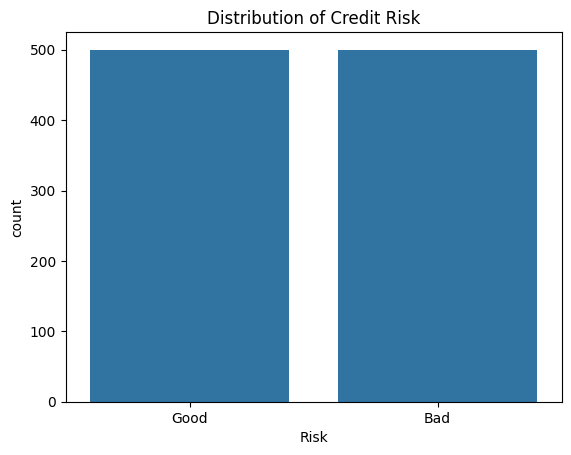

In [19]:
# Create a 'Risk' column (assuming higher credit amount is higher risk)
# You might need to adjust this logic based on the dataset's actual definition of 'Risk'
median_credit_amount = df['Credit amount'].median()
df['Risk'] = df['Credit amount'].apply(lambda x: 'Bad' if x > median_credit_amount else 'Good')

# Display the value counts to confirm the new column
print(df['Risk'].value_counts())

sns.countplot(data=df, x='Risk')
plt.title('Distribution of Credit Risk')
plt.show()

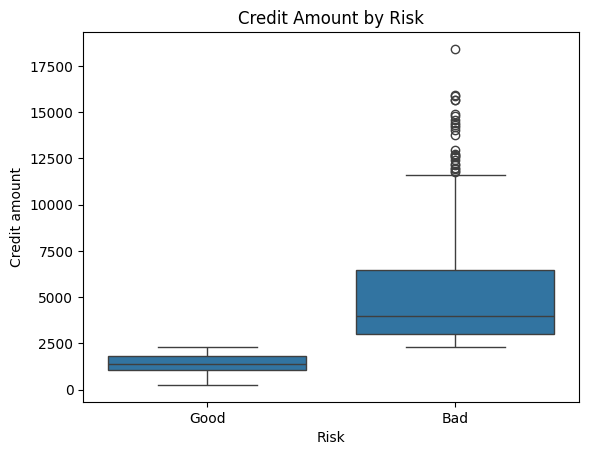

In [13]:
# Boxplot of Credit Amount vs Risk
sns.boxplot(data=df, x='Risk', y='Credit amount')
plt.title('Credit Amount by Risk')
plt.show()

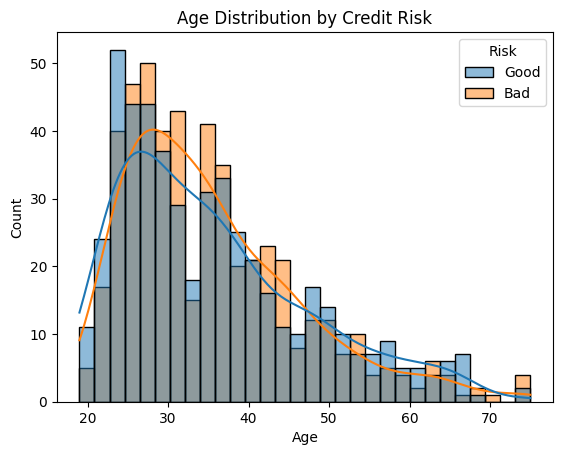

In [15]:
#Age vs Risk
sns.histplot(data=df, x='Age', hue='Risk', kde=True, bins=30)
plt.title('Age Distribution by Credit Risk')
plt.show()

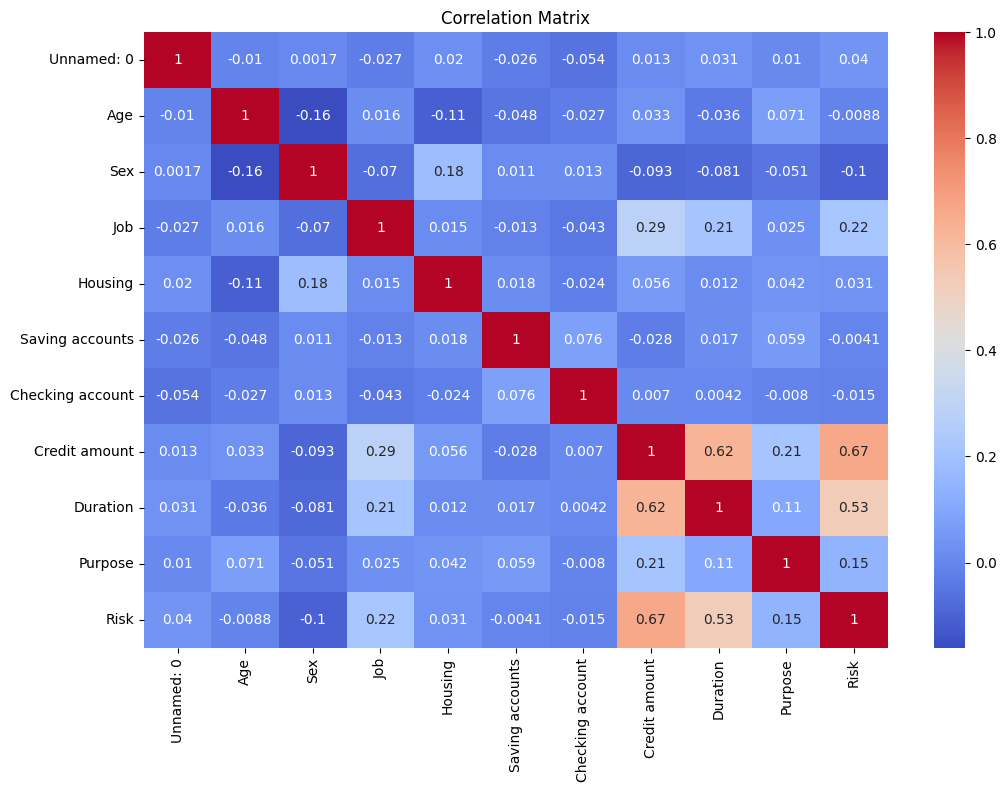

In [20]:
# Encode object columns temporarily to calculate correlation
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = pd.factorize(df_encoded[col])[0]

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

🔍 Exploratory Data Analysis (EDA)

-Dataset Overview:
Analyzed 1,000 customer records from the German Credit Risk dataset, including demographic, financial, and account-related variables.

-Missing Value Handling:

Filled missing values in Saving accounts and Checking account using the mode (most frequent category).


-Key Visualizations:

-Risk Distribution: Showed class imbalance between Good and Bad credit risks.

-Boxplot: Visualized that customers with Bad risk tended to request higher credit amounts.

-Age vs Risk: Younger customers had a slightly higher tendency toward Bad risk.

-Correlation Heatmap: Identified relationships among numerical variables like Age, Duration, and Credit amount.


-Insights:

Longer credit durations and higher credit amounts were more common among Bad risk applicants.

Applicants with missing or lower account balances had higher risk tendencies.